In [58]:
import os
os.getcwd()

'/Users/gracewhyn/Documents/KULIAH/PROJECTS/penyisihan-datavidia-10'

In [59]:
# Load and inspect the provided preprocessed ISPU dataset
import pandas as pd

df = pd.read_csv("ispu_preprocessed.csv")

# Basic inspection outputs
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False).head(20))

print("\nSample rows:")
print(df.head())


Shape: (15356, 12)

Columns:
['periode_data', 'tanggal', 'stasiun', 'pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max', 'parameter_pencemar_kritis', 'kategori']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15356 entries, 0 to 15355
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   periode_data               15356 non-null  int64  
 1   tanggal                    15356 non-null  object 
 2   stasiun                    15356 non-null  object 
 3   pm_sepuluh                 14648 non-null  float64
 4   pm_duakomalima             6579 non-null   float64
 5   sulfur_dioksida            15058 non-null  float64
 6   karbon_monoksida           15151 non-null  float64
 7   ozon                       15014 non-null  float64
 8   nitrogen_dioksida          15047 non-null  float64
 9   max                        15356 non-null  floa

In [60]:
# Deeper missing value summary and basic stats for pollutant columns
pollutant_cols = [
    'pm_sepuluh',
    'pm_duakomalima',
    'sulfur_dioksida',
    'karbon_monoksida',
    'ozon',
    'nitrogen_dioksida'
]

print("\nMissing values (pollutants):")
print(df[pollutant_cols].isna().sum())

print("\nBasic statistics (pollutants):")
print(df[pollutant_cols].describe())

# Check unique categories and stations
print("\nUnique kategori:", df['kategori'].unique())
print("Unique stasiun:", df['stasiun'].unique())



Missing values (pollutants):
pm_sepuluh            708
pm_duakomalima       8777
sulfur_dioksida       298
karbon_monoksida      205
ozon                  342
nitrogen_dioksida     309
dtype: int64

Basic statistics (pollutants):
         pm_sepuluh  pm_duakomalima  sulfur_dioksida  karbon_monoksida  \
count  14648.000000     6579.000000     15058.000000      15151.000000   
mean      54.104997       75.834625        27.865254         20.289618   
std       18.971062       24.137308        15.569663         12.184070   
min        2.000000       10.000000         0.000000          0.000000   
25%       42.000000       60.000000        15.000000         11.000000   
50%       55.000000       77.000000        26.000000         18.000000   
75%       65.000000       91.000000        38.000000         26.000000   
max      187.000000      287.000000       112.000000        134.000000   

               ozon  nitrogen_dioksida  
count  15014.000000       15047.000000  
mean      53.486213 

In [61]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df = df.sort_values(['stasiun','tanggal'])

for col in pollutant_cols:
    df[col] = df.groupby('stasiun')[col].transform(lambda x: x.ffill().bfill())

mask_pm25 = df['pm_duakomalima'].isna()

df.loc[mask_pm25, 'pm_duakomalima'] = (
    df.loc[mask_pm25, 'pm_sepuluh'] * 0.6
)

for col in pollutant_cols:
    df[col] = df.groupby('stasiun')[col].transform(lambda x: x.fillna(x.median()))


In [62]:
df

,periode_data,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori
0,201001,2010-01-01,DKI1,60.0,51.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,201001,2010-01-02,DKI1,32.0,51.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,201001,2010-01-03,DKI1,27.0,51.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,201001,2010-01-04,DKI1,22.0,51.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,201001,2010-01-05,DKI1,25.0,51.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...
15335,202508,2025-08-27,DKI5,57.0,110.0,25.0,11.0,84.0,46.0,110.0,PM25,TIDAK SEHAT
15340,202508,2025-08-28,DKI5,32.0,68.0,25.0,7.0,31.0,28.0,68.0,PM25,SEDANG
15345,202508,2025-08-29,DKI5,27.0,60.0,24.0,6.0,37.0,27.0,60.0,PM25,SEDANG
15350,202508,2025-08-30,DKI5,38.0,72.0,26.0,9.0,30.0,40.0,72.0,PM25,SEDANG


In [63]:
# Deeper missing value summary and basic stats for pollutant columns
pollutant_cols = [
    'pm10',
    'pm25',
    'so2',
    'co',
    'o3',
    'no2'
]

print("\nMissing values (pollutants):")
print(df[pollutant_cols].isna().sum())

print("\nBasic statistics (pollutants):")
print(df[pollutant_cols].describe())

# Check unique categories and stations
print("\nUnique kategori:", df['kategori'].unique())
print("Unique stasiun:", df['stasiun'].unique())


Missing values (pollutants):


KeyError: "None of [Index(['pm10', 'pm25', 'so2', 'co', 'o3', 'no2'], dtype='object')] are in the [columns]"

In [ ]:
print("\nMissing values :")
print(df.isna().sum())

print("\nBasic statistics (pollutants):")
print(df.describe())

# Check unique categories and stations
print("\nUnique kategori:", df['kategori'].unique())
print("Unique stasiun:", df['stasiun'].unique())


Missing values :
periode_data                 0
tanggal                      0
stasiun                      0
pm10                         0
pm25                         0
so2                          0
co                           0
o3                           0
no2                          0
max                          0
parameter_pencemar_kritis    0
kategori                     0
calc_max                     0
pm10_jump                    0
pm25_jump                    0
glitch_pm10                  0
glitch_pm25                  0
day                          0
month                        0
dayofweek                    0
weekofyear                   0
pm10_lag1                    0
pm10_lag3                    0
pm10_lag7                    0
pm25_lag1                    0
pm25_lag3                    0
pm25_lag7                    0
so2_lag1                     0
so2_lag3                     0
so2_lag7                     0
co_lag1                      0
co_lag3              

In [ ]:
df['calc_max'] = df[pollutant_cols].max(axis=1)
(df['calc_max'] != df['max']).sum()


np.int64(4402)

In [ ]:
df[pollutant_cols].describe(percentiles=[0.01,0.99])

,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida
count,15356.000000,15356.000000,15356.000000,15356.000000,15356.000000,15356.000000
mean,53.976556,73.522662,27.695428,20.263089,53.407137,17.117153
std,18.902109,21.447810,15.642490,12.256185,40.360073,11.655028
min,2.000000,10.000000,0.000000,0.000000,2.000000,0.000000
1%,11.000000,26.000000,2.000000,4.000000,8.000000,2.000000
50%,55.000000,67.000000,26.000000,18.000000,42.000000,15.000000
99%,105.000000,124.000000,62.000000,61.000000,207.000000,57.000000
max,187.000000,287.000000,112.000000,134.000000,314.000000,202.000000


In [ ]:
(df['pm_duakomalima'] > df['pm_sepuluh']).sum()

np.int64(12296)

In [ ]:
((df[['pm_sepuluh','pm_duakomalima','sulfur_dioksida','karbon_monoksida','ozon','nitrogen_dioksida']] == 0).sum(axis=1) >= 4).sum()

np.int64(0)

In [ ]:
df = df.sort_values(['stasiun','tanggal'])

df['pm10_jump'] = df.groupby('stasiun')['pm_sepuluh'].diff().abs()
df['pm25_jump'] = df.groupby('stasiun')['pm_duakomalima'].diff().abs()

(df['pm10_jump'] > 80).sum(), (df['pm25_jump'] > 80).sum()


(np.int64(7), np.int64(8))

In [ ]:
df.groupby('kategori')[['pm_sepuluh','pm_duakomalima']].mean()


,pm_sepuluh,pm_duakomalima
kategori,,
BAIK,31.858006,60.803194
SANGAT TIDAK SEHAT,75.457711,65.114428
SEDANG,54.753071,73.108829
TIDAK SEHAT,70.039289,88.193135


In [ ]:
import numpy as np

df['glitch_pm10'] = df['pm10_jump'] > 80
df['glitch_pm25'] = df['pm25_jump'] > 80

df.loc[df['glitch_pm10'], 'pm_sepuluh'] = np.nan
df.loc[df['glitch_pm25'], 'pm_duakomalima'] = np.nan

df['pm_sepuluh'] = df.groupby('stasiun')['pm_sepuluh'].transform(
    lambda x: x.interpolate(method='linear')
)

df['pm_duakomalima'] = df.groupby('stasiun')['pm_duakomalima'].transform(
    lambda x: x.interpolate(method='linear')
)

# mask = df['pm_duakomalima'] > df['pm_sepuluh']

# df.loc[mask, 'pm_sepuluh'] = df.loc[mask, 'pm_duakomalima'] + 10



In [ ]:
df

,periode_data,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,calc_max,pm10_jump,pm25_jump,glitch_pm10,glitch_pm25
0,201001,2010-01-01,DKI1,60.0,51.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG,73.0,NaN,NaN,False,False
1,201001,2010-01-02,DKI1,32.0,51.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK,51.0,28.0,0.0,False,False
2,201001,2010-01-03,DKI1,27.0,51.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK,51.0,5.0,0.0,False,False
3,201001,2010-01-04,DKI1,22.0,51.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK,51.0,5.0,0.0,False,False
4,201001,2010-01-05,DKI1,25.0,51.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK,51.0,3.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,202508,2025-08-27,DKI5,57.0,110.0,25.0,11.0,84.0,46.0,110.0,PM25,TIDAK SEHAT,110.0,3.0,7.0,False,False
15340,202508,2025-08-28,DKI5,32.0,68.0,25.0,7.0,31.0,28.0,68.0,PM25,SEDANG,68.0,25.0,42.0,False,False
15345,202508,2025-08-29,DKI5,27.0,60.0,24.0,6.0,37.0,27.0,60.0,PM25,SEDANG,60.0,5.0,8.0,False,False
15350,202508,2025-08-30,DKI5,38.0,72.0,26.0,9.0,30.0,40.0,72.0,PM25,SEDANG,72.0,11.0,12.0,False,False


In [ ]:
# df[['pm_sepuluh','pm_duakomalima']].isna().sum()
(df['pm_duakomalima'] > df['pm_sepuluh']).sum()


np.int64(12294)

In [ ]:
df['pm_duakomalima'].describe()


count    15356.000000
mean        73.513122
std         21.429173
min         10.000000
25%         60.000000
50%         67.000000
75%         89.000000
max        287.000000
Name: pm_duakomalima, dtype: float64

In [ ]:
(df['pm_duakomalima'] > 200).sum()


np.int64(3)

In [ ]:
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False).head(20))

print("\nSample rows:")
print(df.head())

Shape: (15356, 17)

Columns:
['periode_data', 'tanggal', 'stasiun', 'pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max', 'parameter_pencemar_kritis', 'kategori', 'calc_max', 'pm10_jump', 'pm25_jump', 'glitch_pm10', 'glitch_pm25']

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 15356 entries, 0 to 15355
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   periode_data               15356 non-null  int64         
 1   tanggal                    15356 non-null  datetime64[ns]
 2   stasiun                    15356 non-null  object        
 3   pm_sepuluh                 15356 non-null  float64       
 4   pm_duakomalima             15356 non-null  float64       
 5   sulfur_dioksida            15356 non-null  float64       
 6   karbon_monoksida           15356 non-null  float64       
 7   ozon                       15356 

In [ ]:
dup = df.duplicated(subset=['tanggal','stasiun'])
dup.sum()
# df[dup].sort_values(['stasiun','tanggal']).head(20)



np.int64(9)

In [ ]:
polutan = ['pm_sepuluh','pm_duakomalima','sulfur_dioksida','karbon_monoksida','ozon','nitrogen_dioksida']

df['calc_max'] = df[polutan].max(axis=1)

(df['calc_max'] != df['max']).sum()


np.int64(4413)

In [ ]:
df.groupby('kategori')['max'].describe()


,count,mean,std,min,25%,50%,75%,max
kategori,,,,,,,,
BAIK,2317.0,38.826500,8.474493,5.0,33.0,40.0,46.0,50.0
SANGAT TIDAK SEHAT,201.0,226.935323,25.631442,200.0,208.0,217.0,238.0,314.0
SEDANG,10420.0,73.122553,13.731743,51.0,61.0,72.0,84.0,100.0
TIDAK SEHAT,2418.0,124.354425,22.562828,101.0,107.0,117.0,135.0,199.0


In [ ]:
df.groupby('tanggal')['stasiun'].nunique().value_counts()


stasiun
1    3097
5    2285
4     181
3      21
2      19
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={
    "pm_sepuluh": "pm10",
    "pm_duakomalima": "pm25",
    "sulfur_dioksida": "so2",
    "karbon_monoksida": "co",
    "ozon": "o3",
    "nitrogen_dioksida": "no2"
})


In [ ]:
df = df.sort_values(["stasiun", "tanggal"])

In [ ]:
df["day"] = df["tanggal"].dt.day
df["month"] = df["tanggal"].dt.month
df["dayofweek"] = df["tanggal"].dt.dayofweek
df["weekofyear"] = df["tanggal"].dt.isocalendar().week.astype(int)

In [ ]:
pollutants = ["pm10","pm25","so2","co","o3","no2"]
# lag
for col in pollutants:
    df[f"{col}_lag1"] = df.groupby("stasiun")[col].shift(1)
    df[f"{col}_lag3"] = df.groupby("stasiun")[col].shift(3)
    df[f"{col}_lag7"] = df.groupby("stasiun")[col].shift(7)


In [ ]:
# Rolling 3 dan 7
for col in pollutants:
    df[f"{col}_roll3"] = (
        df.groupby("stasiun")[col]
        .rolling(3)
        .mean()
        .reset_index(level=0, drop=True)
    )

    df[f"{col}_roll7"] = (
        df.groupby("stasiun")[col]
        .rolling(7)
        .mean()
        .reset_index(level=0, drop=True)
    )


In [ ]:
# rolling max 
for col in pollutants:
    df[f"{col}_rollmax7"] = (
        df.groupby("stasiun")[col]
        .rolling(7)
        .max()
        .reset_index(level=0, drop=True)
    )


In [ ]:
# encode stasiun 
df["stasiun"] = df["stasiun"].astype(str)


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15277 entries, 0 to 15276
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   periode_data               15277 non-null  int64         
 1   tanggal                    15277 non-null  datetime64[ns]
 2   stasiun                    15277 non-null  object        
 3   pm10                       15277 non-null  float64       
 4   pm25                       15277 non-null  float64       
 5   so2                        15277 non-null  float64       
 6   co                         15277 non-null  float64       
 7   o3                         15277 non-null  float64       
 8   no2                        15277 non-null  float64       
 9   max                        15277 non-null  float64       
 10  parameter_pencemar_kritis  15277 non-null  object        
 11  kategori                   15277 non-null  object        
 12  calc

In [ ]:
df.to_csv("ispu_clean_fe.csv", index=False)

In [ ]:
import pandas as pd

df = pd.read_csv("ispu_clean_fe.csv", parse_dates=["tanggal"])

df = df.sort_values("tanggal")

split_date = df["tanggal"].quantile(0.8)

train = df[df["tanggal"] <= split_date]
test  = df[df["tanggal"] > split_date]


In [ ]:
drop_cols = [
    "tanggal",
    "kategori",
    "parameter_pencemar_kritis",
    "calc_max",
    "periode_data",
    "glitch_pm10",
    "glitch_pm25"
]

features = [c for c in df.columns if c not in drop_cols]

X_train = train[features]
y_train = train["kategori"]

X_test = test[features]
y_test = test["kategori"]


In [ ]:
X_train

,stasiun,pm10_jump,pm25_jump,glitch_pm10,glitch_pm25,day,month,dayofweek,weekofyear,pm10_lag1,...,o3_roll3,o3_roll7,no2_roll3,no2_roll7,pm10_rollmax7,pm25_rollmax7,so2_rollmax7,co_rollmax7,o3_rollmax7,no2_rollmax7
0,DKI1,23.0,0.0,False,False,8,1,4,1,41.0,...,21.666667,21.142857,13.000000,10.142857,64.0,51.0,8.0,51.0,33.0,15.0
1,DKI1,9.0,0.0,False,False,9,1,5,1,64.0,...,23.000000,19.714286,14.666667,11.142857,64.0,51.0,8.0,51.0,27.0,16.0
2,DKI1,21.0,0.0,False,False,10,1,6,1,55.0,...,22.666667,20.571429,14.333333,11.571429,64.0,51.0,8.0,51.0,27.0,16.0
3,DKI1,21.0,0.0,False,False,11,1,0,2,34.0,...,24.000000,21.714286,14.666667,13.000000,64.0,51.0,10.0,51.0,27.0,16.0
4,DKI1,10.0,0.0,False,False,12,1,1,2,55.0,...,19.333333,20.857143,15.000000,14.285714,64.0,51.0,10.0,51.0,27.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,DKI3,19.0,1.0,False,False,30,11,3,48,56.0,...,21.000000,21.000000,11.333333,14.571429,66.0,101.0,57.0,13.0,27.0,21.0
2246,DKI1,20.0,15.0,False,False,30,11,3,48,58.0,...,31.333333,25.285714,31.333333,30.285714,70.0,101.0,45.0,15.0,34.0,38.0
5391,DKI2,24.0,19.0,False,False,30,11,3,48,62.0,...,29.000000,27.571429,27.000000,31.571429,72.0,99.0,36.0,15.0,34.0,47.0
14669,DKI5,26.0,31.0,False,False,30,11,3,48,56.0,...,55.000000,52.142857,18.666667,20.428571,71.0,112.0,36.0,23.0,61.0,26.0


In [ ]:
features

['stasiun',
 'pm10',
 'pm25',
 'so2',
 'co',
 'o3',
 'no2',
 'max',
 'pm10_jump',
 'pm25_jump',
 'day',
 'month',
 'dayofweek',
 'weekofyear',
 'pm10_lag1',
 'pm10_lag3',
 'pm10_lag7',
 'pm25_lag1',
 'pm25_lag3',
 'pm25_lag7',
 'so2_lag1',
 'so2_lag3',
 'so2_lag7',
 'co_lag1',
 'co_lag3',
 'co_lag7',
 'o3_lag1',
 'o3_lag3',
 'o3_lag7',
 'no2_lag1',
 'no2_lag3',
 'no2_lag7',
 'pm10_roll3',
 'pm10_roll7',
 'pm25_roll3',
 'pm25_roll7',
 'so2_roll3',
 'so2_roll7',
 'co_roll3',
 'co_roll7',
 'o3_roll3',
 'o3_roll7',
 'no2_roll3',
 'no2_roll7',
 'pm10_rollmax7',
 'pm25_rollmax7',
 'so2_rollmax7',
 'co_rollmax7',
 'o3_rollmax7',
 'no2_rollmax7']

In [ ]:
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 5.7 MB/s  0:00:04m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 2.0 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [catboost]3/4 [catboost]

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
from catboost import CatBoostClassifier

cat_features = ["stasiun"]

model = CatBoostClassifier(
    iterations=2000,
    depth=8,
    learning_rate=0.03,
    loss_function="MultiClass",
    eval_metric="TotalF1",
    random_seed=42,
    verbose=200
)

model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    early_stopping_rounds=200
)


0:	learn: 0.9916260	test: 0.9882517	best: 0.9882517 (0)	total: 109ms	remaining: 3m 37s
200:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (12)	total: 2.92s	remaining: 26.2s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 1
bestIteration = 12

Shrink model to first 13 iterations.


In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       361
      SEDANG       1.00      1.00      1.00      2367
 TIDAK SEHAT       1.00      1.00      1.00       325

    accuracy                           1.00      3053
   macro avg       1.00      1.00      1.00      3053
weighted avg       1.00      1.00      1.00      3053



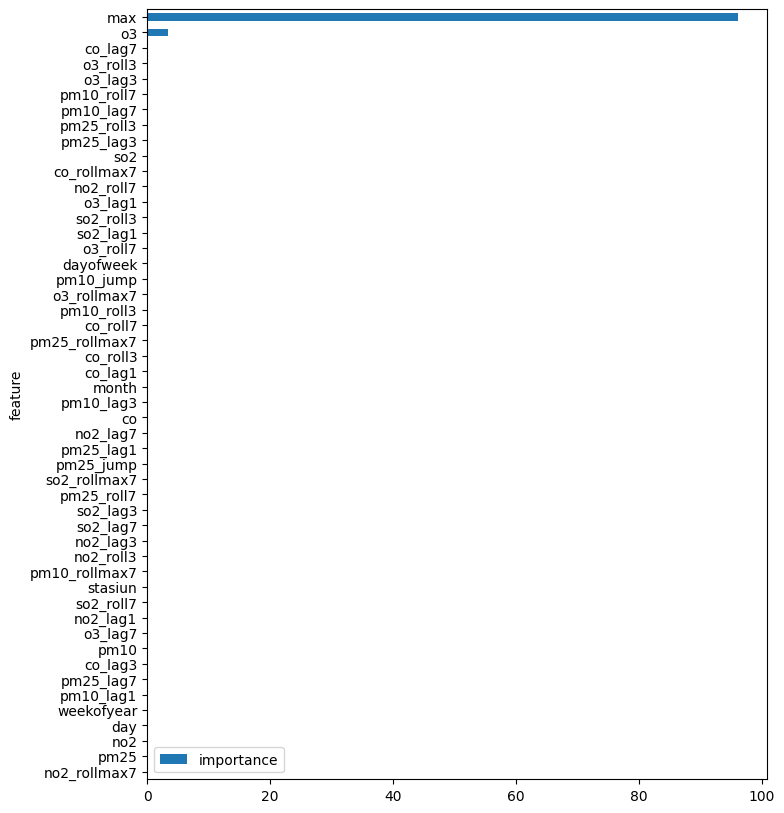

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fi = pd.DataFrame({
    "feature": features,
    "importance": model.get_feature_importance()
}).sort_values("importance", ascending=False)


fi.plot.barh(x="feature", y="importance", figsize=(8,10))
plt.gca().invert_yaxis()
plt.show()


In [ ]:
leak_cols = [
    "pm10",
    "pm25",
    "so2",
    "co",
    "o3",
    "no2",
    "max",
    "calc_max"
]

df = df.drop(columns=leak_cols)


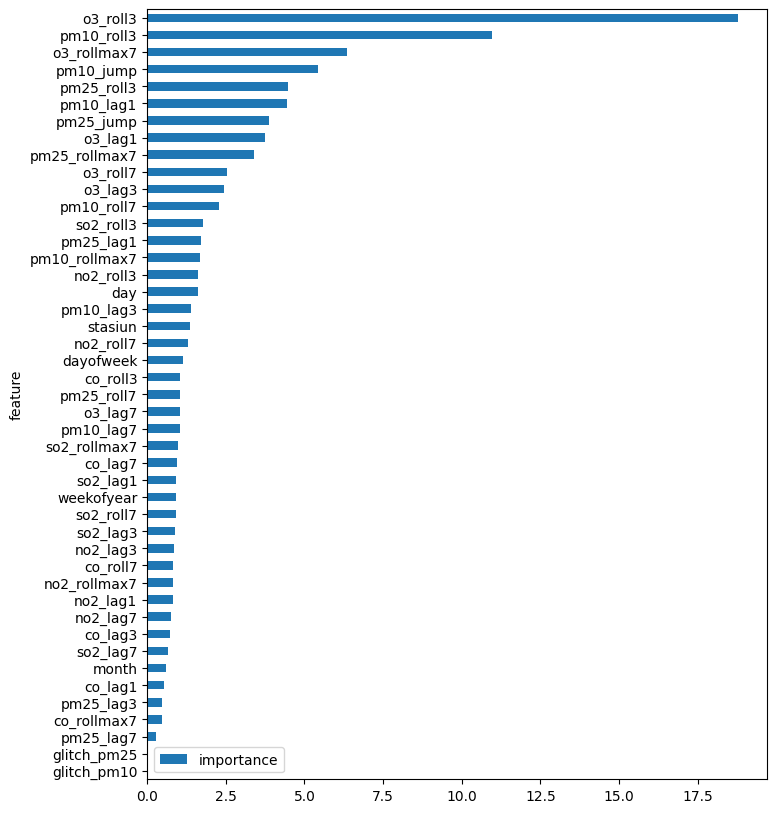

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fi = pd.DataFrame({
    "feature": features,
    "importance": model.get_feature_importance()
}).sort_values("importance", ascending=False)


fi.plot.barh(x="feature", y="importance", figsize=(8,10))
plt.gca().invert_yaxis()
plt.show()


In [ ]:
df = df.sort_values("tanggal")

train = df[df["tanggal"] < "2024-01-01"]
test  = df[df["tanggal"] >= "2024-01-01"]


In [ ]:
from catboost import CatBoostClassifier

drop_cols = ["tanggal", "kategori", "parameter_pencemar_kritis", "periode_data"]

features = [c for c in df.columns if c not in drop_cols]

X_train = train[features]
y_train = train["kategori"]

X_test = test[features]
y_test = test["kategori"]

model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.05,
    loss_function='MultiClass',
    verbose=200
)

model.fit(X_train, y_train, cat_features=["stasiun"])

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))


0:	learn: 1.3095424	total: 11.6ms	remaining: 11.6s
200:	learn: 0.3936520	total: 1.42s	remaining: 5.65s
400:	learn: 0.3347517	total: 2.73s	remaining: 4.07s
600:	learn: 0.3014145	total: 3.99s	remaining: 2.65s
800:	learn: 0.2755289	total: 5.31s	remaining: 1.32s
999:	learn: 0.2540854	total: 6.65s	remaining: 0us
              precision    recall  f1-score   support

        BAIK       0.65      0.63      0.64       361
      SEDANG       0.89      0.94      0.91      2303
 TIDAK SEHAT       0.84      0.52      0.65       319

    accuracy                           0.86      2983
   macro avg       0.79      0.70      0.73      2983
weighted avg       0.85      0.86      0.85      2983



In [66]:
sample = pd.read_csv("sample_submission.csv")
sample.head()


,id,category
0,2025-09-01_DKI1,NaN
1,2025-09-01_DKI2,NaN
2,2025-09-01_DKI3,NaN
3,2025-09-01_DKI4,NaN
4,2025-09-01_DKI5,NaN


In [ ]:
# submission_df = sample.merge(
#     df,
#     on=["tanggal", "stasiun"],
#     how="left"
# )


In [ ]:
# submission_df

,id,category,tanggal,stasiun,periode_data,parameter_pencemar_kritis,kategori,pm10_jump,pm25_jump,glitch_pm10,...,o3_roll3,o3_roll7,no2_roll3,no2_roll7,pm10_rollmax7,pm25_rollmax7,so2_rollmax7,co_rollmax7,o3_rollmax7,no2_rollmax7
0,2025-09-01_DKI1,NaN,2025-09-01,DKI1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-09-01_DKI2,NaN,2025-09-01,DKI2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-09-01_DKI3,NaN,2025-09-01,DKI3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-09-01_DKI4,NaN,2025-09-01,DKI4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-09-01_DKI5,NaN,2025-09-01,DKI5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,2025-11-30_DKI1,NaN,2025-11-30,DKI1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,2025-11-30_DKI2,NaN,2025-11-30,DKI2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,2025-11-30_DKI3,NaN,2025-11-30,DKI3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,2025-11-30_DKI4,NaN,2025-11-30,DKI4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# X_submit = submission_df[features]


In [ ]:
# pred = model.predict(X_submit, prediction_type='Class')
# print(type(pred))
# print(pred.shape)


<class 'numpy.ndarray'>
(455, 1)


In [ ]:
# pred = model.predict(X_submit, prediction_type='Class')

# submission_df["category"] = pred.flatten()


In [ ]:
# final_submit = submission_df[["id", "category"]]
# final_submit.to_csv("submission.csv", index=False)


In [ ]:
# sample["category"] = results
# sample[["id","category"]].to_csv("submission.csv", index=False)


In [ ]:
import pandas as pd

df = pd.read_csv("ispu_clean_fe.csv")
df_hist = df.copy()
df_hist = df_hist.sort_values(["stasiun", "tanggal"])

feature_cols = model.feature_names_

# sample_submission = pd.read_csv("sample_submission.csv")

# sample_submission["date"] = sample_submission["id"].str.split("_").str[0]
# sample_submission["station"] = sample_submission["id"].str.split("_").str[1]

# sample_submission["date"] = pd.to_datetime(sample_submission["date"])


In [ ]:
def build_features_from_history(hist):
    row = hist.iloc[-1].copy()

    # geser lag
    row["pm10_lag1"] = hist.iloc[-1]["pm10_jump"]
    row["pm10_lag3"] = hist.iloc[-3]["pm10_jump"]

    # rolling
    row["pm10_roll3"] = hist.tail(3)["pm10_jump"].mean()
    row["pm10_roll7"] = hist.tail(7)["pm10_jump"].mean()

    # lakukan untuk semua fitur FE yang kamu punya
    return row

def predict_next_day(model, df_hist, station, date):
    hist_station = df_hist[df_hist["stasiun"] == station].sort_values("tanggal")

    new_row = build_features_from_history(hist_station)
    new_row["tanggal"] = date
    new_row["stasiun"] = station

    X = new_row[feature_cols].to_frame().T
    pred = model.predict(X)[0]

    return new_row, pred


In [ ]:
sample["tanggal"] = sample["id"].apply(lambda x: x.split("_")[0])
sample["stasiun"] = sample["id"].apply(lambda x: x.split("_")[1])

sample["tanggal"] = pd.to_datetime(sample["tanggal"])

In [ ]:
sample.head()

,id,category,tanggal,stasiun
0,2025-09-01_DKI1,NaN,2025-09-01,DKI1
1,2025-09-01_DKI2,NaN,2025-09-01,DKI2
2,2025-09-01_DKI3,NaN,2025-09-01,DKI3
3,2025-09-01_DKI4,NaN,2025-09-01,DKI4
4,2025-09-01_DKI5,NaN,2025-09-01,DKI5


In [ ]:
station_map = {}
for s in df_hist["stasiun"].unique():
    code = s.split()[0]
    station_map[code] = s

sample["stasiun"] = sample["stasiun"].map(station_map)


In [ ]:
# submission_df = sample.merge(
#     df,
#     on=["tanggal", "stasiun"],
#     how="left"
# )


In [ ]:
df_hist["tanggal"] = pd.to_datetime(df_hist["tanggal"])
sample["tanggal"] = pd.to_datetime(sample["tanggal"])


In [ ]:
results = []

for _, row in sample.iterrows():
    date = row["tanggal"]
    station = row["stasiun"]

    new_row, pred = predict_next_day(model, df_hist, station, date)
    results.append(pred)

    # tambahkan ke history supaya besok bisa dipakai
    new_row["kategori"] = pred
    df_hist = pd.concat([df_hist, new_row.to_frame().T], ignore_index=True)


In [ ]:
sample["category"] = results
sample.to_csv("submission3.csv", index=False)


set()

In [ ]:
submission = sample_submission[["id", "category"]]
submission.to_csv("submission.csv", index=False)

# second try 

In [64]:
import pandas as pd

df = pd.read_csv("ispu_clean_fe.csv")
df_histo = df.copy()
df_histo = df_histo.sort_values(["stasiun", "tanggal"])

feature_cols = model.feature_names_

# sample_submission = pd.read_csv("sample_submission.csv")

# sample_submission["date"] = sample_submission["id"].str.split("_").str[0]
# sample_submission["station"] = sample_submission["id"].str.split("_").str[1]

# sample_submission["date"] = pd.to_datetime(sample_submission["date"])


In [65]:
last_rows = (
    df_histo.sort_values("tanggal")
    .groupby("stasiun")
    .tail(1)
)


In [67]:
work_df = sample.copy()

work_df["tanggal"] = work_df["id"].str.split("_").str[0]
work_df["stasiun_kode"] = work_df["id"].str.split("_").str[1]
work_df["tanggal"] = pd.to_datetime(work_df["tanggal"])


In [69]:
station_map = {}
for s in df_hist["stasiun"].unique():
    code = s.split()[0]   # DKI1, DKI2, ...
    station_map[code] = s

work_df["stasiun"] = work_df["stasiun_kode"].map(station_map)


In [70]:
def predict_fast(model, last_rows, station, date):
    row = last_rows[last_rows["stasiun"] == station].iloc[0].copy()
    row["tanggal"] = date

    X = row[model.feature_names_].to_frame().T
    return model.predict(X)[0]


In [71]:
results = []

for _, row in work_df.iterrows():
    pred = predict_fast(
        model,
        last_rows,
        row["stasiun"],
        row["tanggal"]
    )
    results.append(pred)


In [72]:
sample["category"] = results
sample.to_csv("submission.csv", index=False)
